# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [3]:
# TODO: Make all necessary imports.
# Importing the essential libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from PIL import Image
import json

# Importing sklearn for model evaluation (optional, if you need it)
from sklearn.metrics import accuracy_score, classification_report


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset with TensorFlow Datasets
print("Downloading the dataset...")
dataset, info = tfds.load(
    'oxford_flowers102',
    with_info=True,
    as_supervised=True,
    download=True,
)

# Display dataset information
print(info)

# Split the dataset into training, validation, and test sets
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']

# Function to preprocess the images
def preprocess(image, label):
    """
    Preprocesses the dataset images by resizing and normalizing.
    """
    # Resize the image to 224x224 pixels
    image = tf.image.resize(image, (224, 224))
    # Normalize the image to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch for performance
batch_size = 32
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Print success message
print("Datasets are ready!")

# Check the shape of one batch
for images, labels in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [5]:
# TODO: Get the number of examples in each set from the dataset info.
# Get dataset info
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Number of examples in each set
num_train_examples = info.splits['train'].num_examples
num_validation_examples = info.splits['validation'].num_examples
num_test_examples = info.splits['test'].num_examples

print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_validation_examples}")
print(f"Number of test examples: {num_test_examples}")

# TODO: Get the number of classes in the dataset from the dataset info.
# Number of classes in the dataset
num_classes = info.features['label'].num_classes

print(f"Number of classes: {num_classes}")

Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149
Number of classes: 102


In [6]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# Get the dataset
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_dataset = dataset['train']

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess)

# Create an iterator for the dataset
iterator = iter(train_dataset)

# Print shape and label of 3 images
for _ in range(3):
    image, label = next(iterator)
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (224, 224, 3), Label: 72
Image shape: (224, 224, 3), Label: 84
Image shape: (224, 224, 3), Label: 70


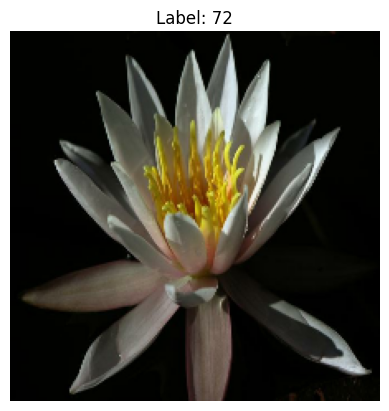

In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_dataset = dataset['train']

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess)

# Create an iterator for the dataset
iterator = iter(train_dataset)

# Get one image and its label
image, label = next(iterator)

# Plot the image
plt.imshow(image)
plt.title(f"Label: {label.numpy()}")
plt.axis('off')  # Hide the axis
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [8]:
import json

# Load the label map
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Print the loaded class names
print(class_names)


{'0': 'pink primrose', '1': 'hard-leaved pocket orchid', '2': 'canterbury bells', '3': 'sweet pea', '4': 'english marigold', '5': 'tiger lily', '6': 'moon orchid', '7': 'bird of paradise', '8': 'monkshood', '9': 'globe thistle', '10': 'snapdragon', '11': "colt's foot", '12': 'king protea', '13': 'spear thistle', '14': 'yellow iris', '15': 'globe-flower', '16': 'purple coneflower', '17': 'peruvian lily', '18': 'balloon flower', '19': 'giant white arum lily', '20': 'fire lily', '21': 'pincushion flower', '22': 'fritillary', '23': 'red ginger', '24': 'grape hyacinth', '25': 'corn poppy', '26': 'prince of wales feathers', '27': 'stemless gentian', '28': 'artichoke', '29': 'sweet william', '30': 'carnation', '31': 'garden phlox', '32': 'love in the mist', '33': 'mexican aster', '34': 'alpine sea holly', '35': 'ruby-lipped cattleya', '36': 'cape flower', '37': 'great masterwort', '38': 'siam tulip', '39': 'lenten rose', '40': 'barbeton daisy', '41': 'daffodil', '42': 'sword lily', '43': 'poi

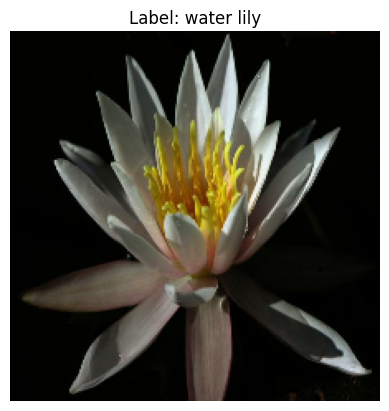

In [9]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image

# Load the label mapping
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Load the dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_dataset = dataset['train']

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)

# Create an iterator for the dataset
iterator = iter(train_dataset)

# Get one image and its label
image, label = next(iterator)
label = label.numpy()

# Plot the image with the corresponding class name
plt.imshow(image)
plt.title(f"Label: {class_names[str(label)]}")
plt.axis('off')  # Hide the axis
plt.show()

## Create Pipeline

In [10]:
# TODO: Create a pipeline for each set.
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Preprocessing function
def preprocess(image, label):
    # Resize the image to 224x224 pixels
    image = tf.image.resize(image, (224, 224))
    # Normalize the image to the range [0, 1]
    image = image / 255.0
    return image, label

# Create the pipeline for the training set
train_dataset = dataset['train']
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create the pipeline for the validation set
validation_dataset = dataset['validation']
validation_dataset = validation_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(32)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create the pipeline for the test set
test_dataset = dataset['test']
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print("Pipelines for training, validation, and test sets are ready!")

Pipelines for training, validation, and test sets are ready!


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

c:\Users\zaytona\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.0122 - loss: 5.3757 - val_accuracy: 0.0206 - val_loss: 4.5978
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.0180 - loss: 4.5466 - val_accuracy: 0.0520 - val_loss: 4.4153
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.0406 - loss: 4.3406 - val_accuracy: 0.0755 - val_loss: 4.1902
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.1382 - loss: 3.8682 - val_accuracy: 0.1098 - val_loss: 3.8250
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2554 - loss: 2.9925 - val_accuracy: 0.1343 - val_loss: 3.9253
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.5046 - loss: 1.9910 - val_accuracy: 0.1343 - val_loss: 4.0570
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.6529 - loss: 1.3421 - val_accuracy: 0.1225 - val_loss: 4.4135
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.7718 - loss: 0.9013 - val_accu

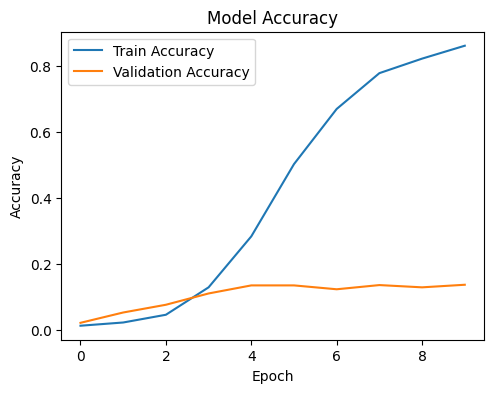

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(102, activation='softmax')  # 102 classes for the Oxford Flowers dataset
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
print("Training the model...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Adjust epochs as needed
)

# Plot the loss and accuracy values achieved during training
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')



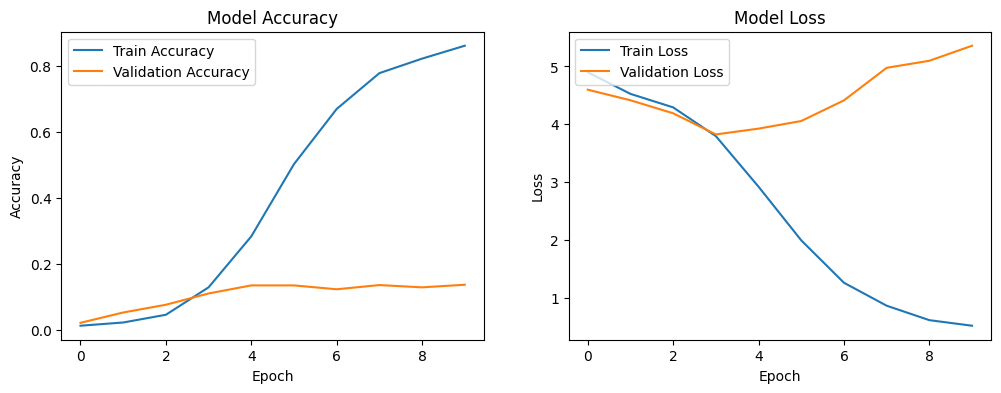

In [13]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

import matplotlib.pyplot as plt

# Assuming the 'history' object contains the training history
# which includes accuracy and loss values for both training and validation sets

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [14]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

193/193 ━━━━━━━━━━━━━━━━━━━━ 93s 478ms/step - accuracy: 0.1229 - loss: 5.6363
Test Loss: 5.651840686798096
Test Accuracy: 12.20%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [15]:
# TODO: Save your trained model as a Keras model.
# Save the trained model as an HDF5 file
model.save('flower_classifier_model.h5')
print("Model saved as 'flower_classifier_model.h5'")

Model saved as 'flower_classifier_model.h5'


## Load the Keras Model

Load the Keras model you saved above.

In [16]:
# TODO: Load the Keras model
import tensorflow as tf

# Load the trained model
loaded_model = tf.keras.models.load_model('flower_classifier_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})
print("Model loaded successfully!")


Model loaded successfully!


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [17]:
import tensorflow as tf
import numpy as np
from PIL import Image

def process_image(image_path):
    """
    Processes an input image to a normalized numpy array of shape (224, 224, 3).
    
    Args:
        image_path (str): Path to the input image.
    
    Returns:
        np.ndarray: Preprocessed image as a numpy array.
    """
    # Load the image
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image = np.array(image)

    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    # Resize the image to the required size
    image = tf.image.resize(image, (224, 224))

    # Normalize the pixel values to the range [0, 1]
    image /= 255.0

    # Convert the tensor back to a numpy array
    image = image.numpy()

    return image


def predict(image_path, model, top_k):
    """
    Predicts the top K classes for a given image using a trained model.
    
    Args:
        image_path (str): Path to the input image.
        model (tf.keras.Model): Pre-trained model for prediction.
        top_k (int): Number of top predictions to return.
    
    Returns:
        tuple: Top K probabilities and corresponding class labels.
    """
    # Process the image
    image = process_image(image_path)

    # Add a batch dimension to the image
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    predictions = model.predict(image)

    # Get the top K predictions
    top_k_indices = predictions[0].argsort()[-top_k:][::-1]
    top_k_probabilities = predictions[0][top_k_indices]
    top_k_classes = [str(i) for i in top_k_indices]

    return top_k_probabilities, top_k_classes


# Example usage (ensure `loaded_model` is a pre-trained TensorFlow model)
# Replace 'path/to/your/image.jpg' with the actual image path.
# loaded_model = tf.keras.models.load_model('path/to/your/model') # Uncomment and replace with your model path
# image_path = 'path/to/your/image.jpg'
# top_k = 5

# probs, classes = predict(image_path, loaded_model, top_k)
# print(probs)
# print(classes)


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

In [18]:
import os
import json
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
import matplotlib.pyplot as plt

# ==========================
# 1. Load and Print label_map.json
# ==========================
json_path = 'label_map.json'

if os.path.exists(json_path):
    with open(json_path, 'r') as f:
        class_names = json.load(f)
    print("Loaded class names:", class_names)
else:
    print(f"Error: {json_path} not found!")

# ==========================
# 2. Load Oxford Flowers Dataset
# ==========================
dataset_name = 'oxford_flowers102'

try:
    (dataset_train, dataset_val, dataset_test), dataset_info = tfds.load(
        dataset_name, split=['train', 'validation', 'test'], as_supervised=True, with_info=True
    )
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# ==========================
# 3. Image Preprocessing Function (Fixes Shape Issue)
# ==========================
def preprocess(image, label):
    """Resizes and normalizes images."""
    image = tf.image.resize(image, (224, 224))  # Resize all images to (224, 224)
    image = image / 255.0  # Normalize
    return image, label

# Apply preprocessing to datasets
dataset_train = dataset_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
dataset_val = dataset_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
dataset_test = dataset_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# ==========================
# 4. Model Definition (Simple CNN)
# ==========================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(102, activation='softmax')  # 102 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==========================
# 5. Train the Model (After Fixing Batching Issue)
# ==========================
print("Training the model...")
model.fit(dataset_train, validation_data=dataset_val, epochs=10)

# Save the model
model.save('flower_classifier_model.keras')
print("Model saved as 'flower_classifier_model.keras'")


Loaded class names: {'0': 'pink primrose', '1': 'hard-leaved pocket orchid', '2': 'canterbury bells', '3': 'sweet pea', '4': 'english marigold', '5': 'tiger lily', '6': 'moon orchid', '7': 'bird of paradise', '8': 'monkshood', '9': 'globe thistle', '10': 'snapdragon', '11': "colt's foot", '12': 'king protea', '13': 'spear thistle', '14': 'yellow iris', '15': 'globe-flower', '16': 'purple coneflower', '17': 'peruvian lily', '18': 'balloon flower', '19': 'giant white arum lily', '20': 'fire lily', '21': 'pincushion flower', '22': 'fritillary', '23': 'red ginger', '24': 'grape hyacinth', '25': 'corn poppy', '26': 'prince of wales feathers', '27': 'stemless gentian', '28': 'artichoke', '29': 'sweet william', '30': 'carnation', '31': 'garden phlox', '32': 'love in the mist', '33': 'mexican aster', '34': 'alpine sea holly', '35': 'ruby-lipped cattleya', '36': 'cape flower', '37': 'great masterwort', '38': 'siam tulip', '39': 'lenten rose', '40': 'barbeton daisy', '41': 'daffodil', '42': 'swo

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [20]:
import numpy as np
import tensorflow as tf
from PIL import Image

def process_image(image_path):
    """Preprocesses an image for the model."""
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to match model input size
    image = np.asarray(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

def predict(image_path, model_path, top_k=5):
    """Predicts the top K most likely classes for an image.
    
    Args:
        image_path (str): Path to the image file.
        model_path (str): Path to the saved model.
        top_k (int): Number of top probable classes to return.
    
    Returns:
        tuple: Top K probabilities and their corresponding class labels.
    """
    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Preprocess the image
    image = process_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Get predictions
    predictions = model.predict(image)[0]  # Get the first (and only) batch output

    # Get top K predictions
    top_k_indices = np.argsort(predictions)[-top_k:][::-1]  # Indices of top K classes
    top_k_probs = predictions[top_k_indices]  # Corresponding probabilities

    # Convert indices to class labels (modify as needed based on your dataset)
    top_k_classes = [str(index) for index in top_k_indices]

    return top_k_probs, top_k_classes

# Example usage
image_path = './test_images/cautleya_spicata.jpg'
model_path = 'flower_classifier_model.h5'  # Replace with the actual model path

probs, classes = predict(image_path, model_path, top_k=5)
print("Probabilities:", probs)
print("Classes:", classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Probabilities: [0.97053087 0.01661441 0.0036893  0.00340351 0.00132408]
Classes: ['60', '20', '50', '91', '39']


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import json

# Load class names from JSON file
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

def process_image(image_path):
    """Preprocesses an image for the model."""
    image = Image.open(image_path)  # Open image
    image = np.array(image)  # Convert to NumPy array
    
    if image.shape[-1] == 4:  # If image has 4 channels (RGBA), convert to RGB
        image = image[:, :, :3]
    
    image = tf.convert_to_tensor(image, dtype=tf.float32)  # Convert to Tensor
    image = tf.image.resize(image, (224, 224))  # Resize
    image = image / 255.0  # Normalize
    return image.numpy()  # Return as NumPy array

def predict(image_path, model_path, top_k=5):
    """Predicts the top K most likely classes for an image.
    
    Args:
        image_path (str): Path to the image file.
        model_path (str): Path to the saved model.
        top_k (int): Number of top predictions to return.

    Returns:
        tuple: Top K probabilities and their corresponding class labels.
    """
    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Preprocess the image
    image = process_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(image)[0]
    top_indices = predictions.argsort()[-top_k:][::-1]

    top_probs = predictions[top_indices]
    top_classes = [class_names[str(i)] for i in top_indices]

    return top_probs, top_classes

def display_image_and_predictions(image_path, model_path):
    """Displays the image and a bar chart of the top 5 predicted classes."""
    # Get predictions
    probs, classes = predict(image_path, model_path)

    # Display the image
    image = Image.open(image_path)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input Image')

    # Display the bar chart of predictions
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probs, color='skyblue')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()  # Highest probability at the top
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = './test_images/cautleya_spicata.jpg'
model_path = 'flower_classifier_model.h5'  # model path
display_image_and_predictions(image_path, model_path)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './saved_model/my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)